In [1]:
import tensorflow as tf


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.

In [10]:

x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(-0.005, 0.005, x_data.shape).astype(np.float32)
y_data = x_data * 0.1 + 0.3 + noise

(300, 1)

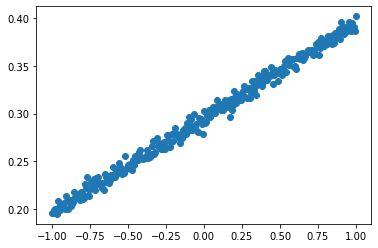

In [11]:
plt.scatter(x_data, y_data)
x_data.shape

weight = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))

y = weight * x_data + biases

loss = tf.reduce_mean(tf.square(y - y_data))

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

训练

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(weight), sess.run(biases))

with tf.Session() as sess:
    result = sess.run()
    
input = tf.placeholder()

In [12]:
def add_layer(input, in_size, out_size, activate_function=None):
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            weights = tf.Variable(tf.random_normal([in_size, out_size]), name='W')
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b')
        with tf.name_scope('predict_value'):
            predict_value = tf.matmul(input, weights) + biases
        if activate_function == None:
            output = predict_value
        else:
            output = activate_function(predict_value)
        return output


In [13]:
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32, [None, 1], name='x_in')
    ys = tf.placeholder(tf.float32, [None, 1], name='y_in')

In [14]:
l1 = add_layer(xs, 1, 10, activate_function=tf.nn.relu)

In [15]:
prediction = add_layer(l1, 10, 1, activate_function=None)

In [16]:
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))

In [17]:
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [18]:
init = tf.global_variables_initializer()

当运算要用到`placeholder`时，需要用feed_dict这个字典来指定输入

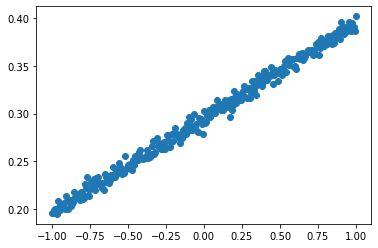

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

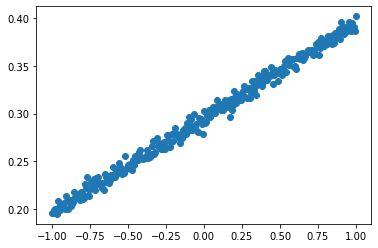

0.03359781
0.0030054795
0.0007085602
0.00022514259
0.00010952737
7.574486e-05
6.2052095e-05
5.4243697e-05
4.8840775e-05
4.481775e-05
4.174631e-05
3.9382638e-05
3.7411006e-05
3.586296e-05
3.465629e-05
3.3714685e-05
3.297787e-05
3.239946e-05
3.1943993e-05
3.15833e-05
3.1294385e-05
3.1061227e-05
3.087247e-05
3.0718387e-05
3.059114e-05
3.0484758e-05
3.039452e-05
3.0317391e-05
3.0249901e-05
3.0190582e-05


In [21]:
sess = tf.Session()
writer = tf.summary.FileWriter("logs/", sess.graph)
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

for i in range(300):
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 10 == 0:
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
        predict_value = sess.run(prediction, feed_dict={xs: x_data})
        ax.plot(x_data, predict_value, 'r-')
        plt.pause(0.1)